In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Set random seed for reproducibility
np.random.seed(42)


# **1. Define the Dataset - Binary Patterns for A, B, C**

Training Letters:


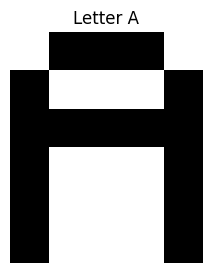

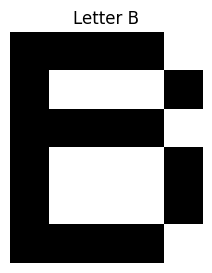

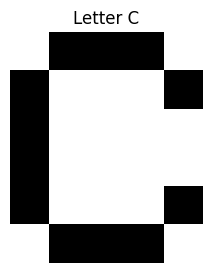

In [12]:
# Letter patterns (5x6 grids flattened to 1D arrays)
A = np.array([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1
])

B = np.array([
    1, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 0
])

C = np.array([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 0,
    1, 0, 0, 0, 0,
    1, 0, 0, 0, 1,
    0, 1, 1, 1, 0
])

# Create training data
X_train = np.array([A, B, C]).T  # 30x3 matrix (features x samples)
y_train = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
]).T  # 3x3 matrix (one-hot encoded)

# Function to display letters
def display_letter(pattern, label=None):
    plt.figure(figsize=(3, 3))
    plt.imshow(pattern.reshape(6, 5), cmap='binary')
    plt.axis('off')
    if label:
        plt.title(f"Letter {label}")
    plt.show()

# Display sample letters
print("Training Letters:")
display_letter(A, "A")
display_letter(B, "B")
display_letter(C, "C")


# **2. Neural Network Implementation**

In [13]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with small random values
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros((output_size, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(self.W1, X) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Output layer
        self.z2 = np.dot(self.W2, self.a1) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def compute_loss(self, y_true, y_pred):
        # Binary cross-entropy loss
        m = y_true.shape[1]
        loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
        return loss

    def backward(self, X, y_true, y_pred, learning_rate):
        m = y_true.shape[1]

        # Output layer gradients
        dZ2 = y_pred - y_true
        dW2 = np.dot(dZ2, self.a1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m

        # Hidden layer gradients
        dZ1 = np.dot(self.W2.T, dZ2) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        # Update weights
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        losses = []
        accuracies = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute loss and accuracy
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)

            predictions = np.argmax(y_pred, axis=0)
            true_labels = np.argmax(y, axis=0)
            accuracy = np.mean(predictions == true_labels)
            accuracies.append(accuracy)

            # Backward pass
            self.backward(X, y, y_pred, learning_rate)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

        return losses, accuracies

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=0)


# **3. Train the Neural Network**

Epoch 0, Loss: 2.0864, Accuracy: 0.3333
Epoch 1000, Loss: 0.0632, Accuracy: 1.0000
Epoch 2000, Loss: 0.0201, Accuracy: 1.0000
Epoch 3000, Loss: 0.0117, Accuracy: 1.0000
Epoch 4000, Loss: 0.0082, Accuracy: 1.0000
Epoch 5000, Loss: 0.0063, Accuracy: 1.0000
Epoch 6000, Loss: 0.0051, Accuracy: 1.0000
Epoch 7000, Loss: 0.0043, Accuracy: 1.0000
Epoch 8000, Loss: 0.0037, Accuracy: 1.0000
Epoch 9000, Loss: 0.0033, Accuracy: 1.0000


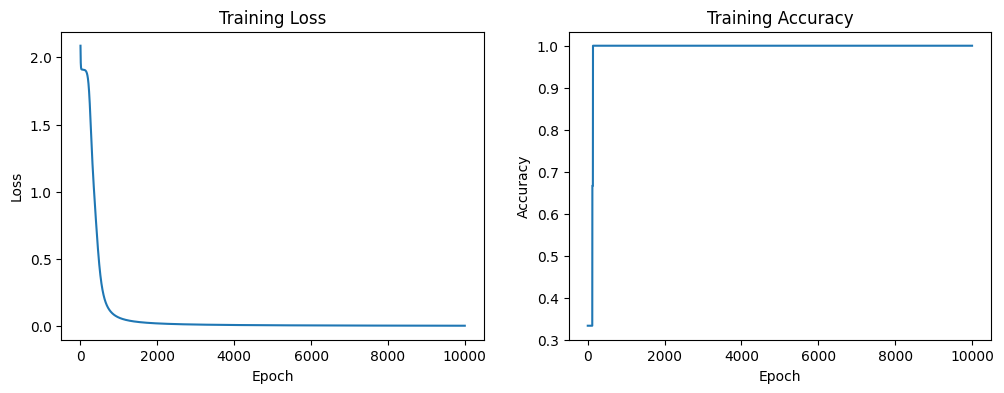

In [14]:
# Initialize network
input_size = 30  # 5x6 pixels
hidden_size = 10  # Arbitrary choice
output_size = 3   # A, B, C
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train network
epochs = 10000
learning_rate = 0.1
losses, accuracies = nn.train(X_train, y_train, epochs, learning_rate)

# Plot training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


# **4. Test the Network**


Test Results:


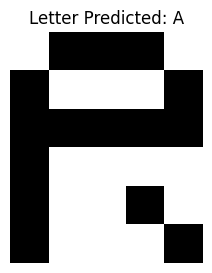

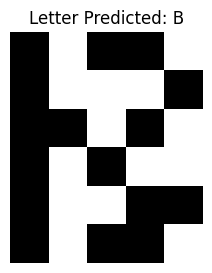

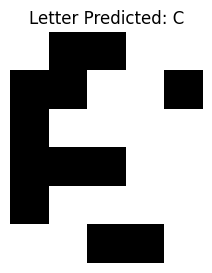

In [15]:
# Create test patterns (slightly noisy versions of the letters)
def add_noise(pattern, noise_level=0.1):
    noise = np.random.choice([0, 1], size=pattern.shape, p=[1-noise_level, noise_level])
    return (pattern + noise) % 2  # Ensure binary output


test_A = add_noise(A)
test_B = add_noise(B)
test_C = add_noise(C)

X_test = np.array([test_A, test_B, test_C]).T

# Make predictions
predictions = nn.predict(X_test)
letter_map = {0: 'A', 1: 'B', 2: 'C'}

# Display test letters and predictions
print("\nTest Results:")
for i, pattern in enumerate([test_A, test_B, test_C]):
    predicted = letter_map[predictions[i]]
    display_letter(pattern, f"Predicted: {predicted}")


# **5. Network Analysis**

In [16]:
# Print final weights
print("\nFinal Hidden Layer Weights (W1):")
print(nn.W1.shape)
print("\nFinal Output Layer Weights (W2):")
print(nn.W2.shape)



Final Hidden Layer Weights (W1):
(10, 30)

Final Output Layer Weights (W2):
(3, 10)



Random Pattern Prediction: A


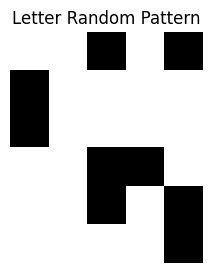

In [18]:
# Test with completely random pattern
random_pattern = np.random.randint(0, 2, size=30)
random_pred = nn.predict(random_pattern.reshape(-1, 1))
print(f"\nRandom Pattern Prediction: {letter_map[random_pred[0]]}")
display_letter(random_pattern, "Random Pattern")